# Library

In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None 


# Explorative Data Analysis

## Get Input

In [32]:
df_true = pd.read_csv("train.csv")
df = df_true.sample(frac=0.8)
df_test = df_true.drop(df.index) 
del df["Id"]

df['SalePrice'] = np.log(df['SalePrice'])
df['GrLivArea'] = np.log(df['GrLivArea'])

## Correlation Checking

<AxesSubplot:>

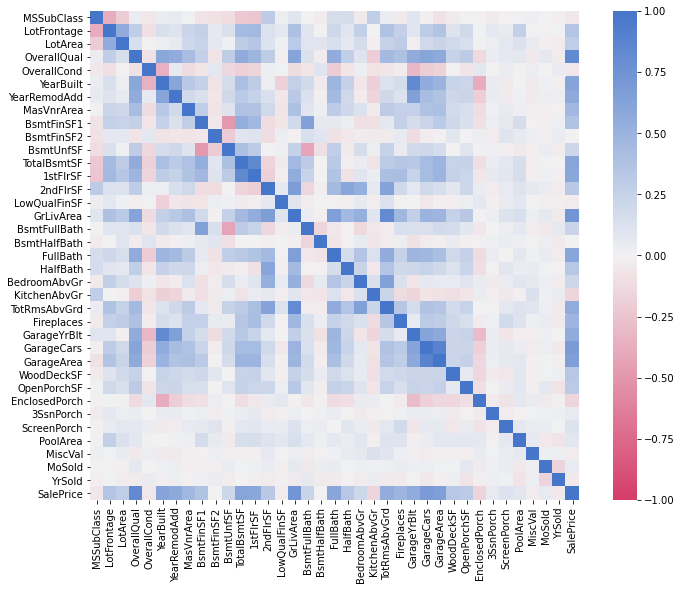

In [33]:
"""
for col in df.columns: 
    if ((df.dtypes[col] == 'int64' or df.dtypes[col] == 'float64') and df[col].isnull().sum() == 0):
        df.plot.scatter(x=col, y='SalePrice', xlim = (df[col].min()-1, df[col].max()+1), ylim=(0,800000))

for col in df.columns: 
    data = pd.concat([df['SalePrice'], df[col]], axis=1)
    f, ax = plt.subplots(figsize=(20,20))
    fig = sns.boxplot(x=col, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);
"""

f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), square=True, vmax=1, vmin=-1, cmap=sns.diverging_palette(0, 255, n = 255))


## Keeping Important Features

In [34]:

"""
cols = df.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, annot=True, cbar=True, square=True, yticklabels=cols.values, xticklabels=cols.values)

new_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set()
sns.pairplot(df[new_cols], size=2.5) 
plt.show()
"""

important_feature = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

## Missing Data

In [35]:
total = df.isnull().sum().sort_values(ascending=False) 
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) 
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
missing_data.head(20)

# Discard PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage (Missing >= 15% data)
# Discard Garage and Bsmt feature due to GarageCars and TotalBsmtSF
# Discard one Eletrical Data

df = df.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)

## Outliers

In [36]:
for col in important_feature:
    """
    data = pd.concat([df['SalePrice'], df[col]], axis=1)
    f, ax = plt.subplots(figsize=(9,9))
    fig = sns.boxplot(x=col, y="SalePrice", data=data)
    fig.axis(ymin=df['SalePrice'].min(), ymax=df['SalePrice'].max())
    """
    feat = pd.unique(df[col])
    for ft in feat: 
        data = pd.concat([df[col], df['SalePrice']], axis=1)
        dt = data['SalePrice'][data[data[col] == ft].index]
        print(dt)
        Q1, Q3 = dt.quantile([0.25, 0.75])
        IQR = Q3 - Q1; 
        Q1 -= 1.5 * IQR 
        Q3 += 1.5 * IQR 
        outlier = dt[dt >= Q3].index.union(dt[dt <= Q1].index)
        df = df.drop(index = outlier, axis = 1)

        

1153    11.699405
645     11.872347
95      12.128111
81      11.941456
260     12.078239
          ...    
1103    11.979799
1320    11.960811
114     12.466512
436     11.661345
173     12.001505
Name: SalePrice, Length: 298, dtype: float64
562     11.589887
643     11.931636
79      11.608236
369     11.995352
1047    11.884489
          ...    
1101    11.691072
1072    11.424094
556     11.856515
1233    11.863582
1011    11.512925
Name: SalePrice, Length: 319, dtype: float64
21      11.845103
186     12.061047
1157    12.345835
1121    12.268578
975     12.013701
          ...    
802     12.149502
567     12.273731
193     11.775290
275     12.230765
443     12.058153
Name: SalePrice, Length: 244, dtype: float64
917     11.813030
1212    11.635143
1262    11.992260
1130    11.813030
1163    11.598727
          ...    
495     10.460242
1345    11.594505
896     11.575900
1190    12.031719
106     11.512925
Name: SalePrice, Length: 94, dtype: float64
320     12.744444
527     13.

In [37]:
print(df)
print(df.shape)

      MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
643           60       RL    10793   Pave      Reg         Lvl    AllPub   
260           80       RL    19296   Pave      Reg         Lvl    AllPub   
122           20       RL     9464   Pave      Reg         Lvl    AllPub   
1047          20       RL     9245   Pave      IR2         Lvl    AllPub   
331           20       RL     8176   Pave      Reg         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1233          20       RL    12160   Pave      IR1         Lvl    AllPub   
1011          90       RL     9825   Pave      Reg         Lvl    AllPub   
193          160       RM     2522   Pave      Reg         Lvl    AllPub   
1320          20       RL     8400   Pave      Reg         Lvl    AllPub   
275           50       RL     7264   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch  \
643     Inside   

## Others

In [38]:
df = pd.get_dummies(df)

# Linear Regression